## IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 200)

In [2]:
# Reading data
data = pd.read_csv(r'C:\Users\Shubham Singh\Desktop\Lead Scoring Assignment\Leads.csv')


## INSPECTING THE DATA

In [3]:
#Top 10 rows of the dataset
data.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [4]:
# Checking the shape of the dataframe
data.shape

(9240, 37)

In [5]:
# Checking data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

# Data Cleaning and missing value handling

In [6]:
# lets replace all the 'Select' values in all the coulmn by np.nan
data = data.replace('Select', np.nan)

In [7]:
# Checking null value percentage for all the columns repectively
null_per = data.isnull().mean() * 100
null_per

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [8]:
# Lead Source                                       0.38 %
# TotalVisits                                       1.48 %
# Page Views Per Visit                              1.48 %
# Last Activity                                     1.11 %
# Country                                          26.63 %
# Specialization                                   36.58 %
# How did you hear about X Education               78.46 %
# What is your current occupation                  29.11 %
# What matters most to you in choosing a course    29.31 %
# Tags                                             36.28 %
# Lead Quality                                     51.59 %
# Lead Profile                                     74.18 %
# City                                             39.70 %
# Asymmetrique Activity Index                      45.64 %
# Asymmetrique Profile Index                       45.64 %
# Asymmetrique Activity Score                      45.64 %
# Asymmetrique Profile Score                       45.64 %

In [9]:
# Deleting columns with more than 45% missing values

cols=data.columns

for i in cols:
    if((100*(data[i].isnull().sum()/len(data.index))) >= 45):
        data.drop(i, 1, inplace = True)

In [10]:
# Checking data shape
data.shape
# Now we have total 30 columns left 

(9240, 30)

In [11]:
# Columns with very less missing values
# For columns which have less than 5% of missing values except 0%
# We can simply remove the such rows if the missing values count is very low
x=data.columns
for m2 in x:
    if((100*(data[m2].isnull().sum()/len(data.index))) < 5) and (100*(data[m2].isnull().sum()/len(data.index))) !=0:
        print(m2)

Lead Source
TotalVisits
Page Views Per Visit
Last Activity


In [12]:
# Removing the rows from all the columns mentioned above as these have less than 2% missing values which we have seen before.
data = data.dropna(subset = ['Lead Source', 'TotalVisits', 'Page Views Per Visit','Last Activity'])


In [13]:
# Lets look at the Columns one by one which are having missing values
# For columns which have more than 5% of missing values
col=data.columns
for m1 in col:
    if((100*(data[m1].isnull().sum()/len(data.index))) >= 5):
        print(m1)

Country
Specialization
What is your current occupation
What matters most to you in choosing a course
Tags
City


In [14]:
# Lets check these columns one by one to decide if we should remove them or if any imputation can be done 

# Country --------------------------------------------------------25.30% of missing values
# Specialization -------------------------------------------------36.16% of missing values
# What is your current occupation  -------------------------------29.1% of missing values
# What matters most to you in choosing a course ------------------29.3% of missing values
# Tags  ----------------------------------------------------------36.28% of missing values
# City  ----------------------------------------------------------39.70% of missing values


In [15]:
unwanted_cols = []

#### Missing values handling in 'Country' coulmn


In [16]:
data['Country'].describe()

count      6778
unique       38
top       India
freq       6491
Name: Country, dtype: object

In [17]:
data['Country'].value_counts()

India                   6491
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Canada                     4
South Africa               4
Germany                    4
Nigeria                    4
Kuwait                     4
Sweden                     3
Asia/Pacific Region        2
China                      2
Uganda                     2
Philippines                2
Belgium                    2
Netherlands                2
Italy                      2
Ghana                      2
Bangladesh                 2
Malaysia                   1
Liberia                    1
Russia                     1
Sri Lanka                  1
Vietnam                    1
Denmark                    1
Tanzania      

In [18]:
# Out of 6779 non null countries India has 6492 count.
# 'Country' columns has skewed distribution of categorical data
# Adding to the unwanted_cols to remove later
unwanted_cols.append('Country')

#### Missing values handling in 'Specialization' coulmn.

In [19]:
data.Specialization.describe()

count                   5792
unique                    18
top       Finance Management
freq                     959
Name: Specialization, dtype: object

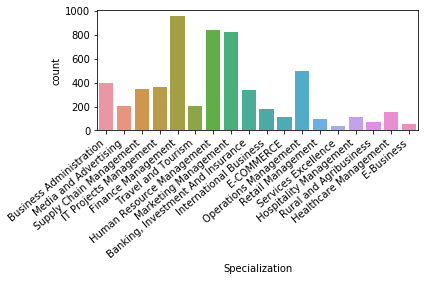

In [20]:
# Specialization EDA
S = sns.countplot(x='Specialization' , data = data)
S.set_xticklabels(S.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [21]:
data['Specialization'].value_counts()

Finance Management                   959
Human Resource Management            837
Marketing Management                 823
Operations Management                499
Business Administration              399
IT Projects Management               366
Supply Chain Management              346
Banking, Investment And Insurance    335
Travel and Tourism                   202
Media and Advertising                202
International Business               176
Healthcare Management                156
E-COMMERCE                           111
Hospitality Management               111
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [22]:
# From count plot and value counts distributions null values in 'Specialization' column can be because of category unavailability. 
# Creating a new column for null values by category - Unspecified.

data['Specialization'] = data['Specialization'].replace(np.nan, 'Unspecified')

In [23]:
#  Checking all the Specialization unique categories
data['Specialization'].unique()

array(['Unspecified', 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [24]:
# Creating a new specialization - 'management' and clubbing all the management related specializations.

data['Specialization'] = data['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management')  

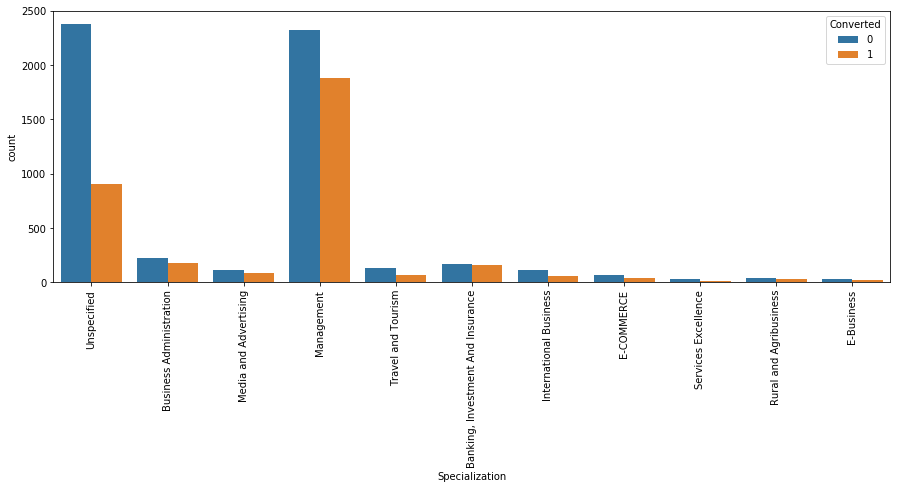

In [25]:
# Visualizing Specialization and Conversion trend

plt.figure(figsize=(15,5))
s1=sns.countplot(data.Specialization, hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Missing values handling in 'What matters most to you in choosing a course' coulmn.

In [26]:
data['What matters most to you in choosing a course'].describe()

count                        6372
unique                          3
top       Better Career Prospects
freq                         6370
Name: What matters most to you in choosing a course, dtype: object

In [27]:
data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6370
Other                           1
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64

In [28]:
# The 'How did you hear about X Education' column has skewed distribution
# Adding column to unwated_cols to remove later
unwanted_cols.append( 'What matters most to you in choosing a course')

#### Missing values handling in 'Tags' coulmn.

In [29]:
# Missing value percentage for 'Tags' column
data['Tags'].isnull().mean() * 100

36.665197266916465

In [30]:
data['Tags'].describe()

count                                    5747
unique                                     26
top       Will revert after reading the email
freq                                     2016
Name: Tags, dtype: object

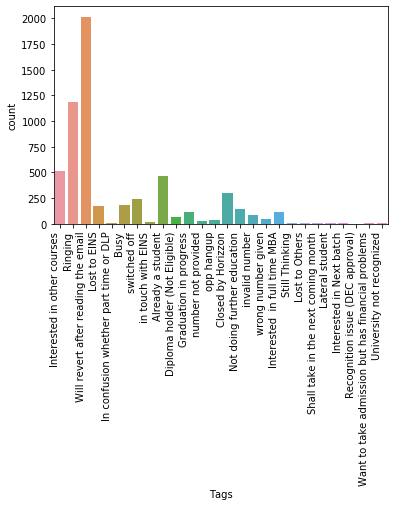

In [31]:
# Tags countploy
S = sns.countplot(x='Tags' , data = data)
S.set_xticklabels(S.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()


In [32]:
# Imputing missing values by mode
data['Tags'] = data['Tags'].replace(np.nan, 'Will revert after reading the email')

#### Missing values handling in 'City' coulmn.

In [33]:
data['City'].describe()

count       5499
unique         6
top       Mumbai
freq        3177
Name: City, dtype: object

In [34]:
data['City'].value_counts()

Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [35]:
# Clubbing Thane & Outskirts with Mumbai
# Clubbing smaller frequency count cities with Other Cities
data['City'] = data['City'].replace('Thane & Outskirts','Mumbai')
data['City'] = data['City'].replace(['Other Cities of Maharashtra','Other Metro Cities','Tier II Cities'],'Other Cities')

#### Missing values handling in 'What is your current occupation' coulmn.

In [36]:
data['What is your current occupation'].describe()

count           6391
unique             6
top       Unemployed
freq            5476
Name: What is your current occupation, dtype: object

In [37]:
data['What is your current occupation'].value_counts()

Unemployed              5476
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [38]:
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan,'Other')
data['What is your current occupation'] = data['What is your current occupation'].replace(['Housewife','Businessman'],'Other')

In [39]:
data['What is your current occupation'].value_counts()

Unemployed              5476
Other                   2715
Working Professional     677
Student                  206
Name: What is your current occupation, dtype: int64

In [40]:
unwanted_cols

['Country', 'What matters most to you in choosing a course']

In [41]:
# Removing unwated columns
data = data.drop(['Country',
 'What matters most to you in choosing a course'],
                 axis = 1)

In [42]:
data.isnull().mean() * 100

Prospect ID                                  0.000000
Lead Number                                  0.000000
Lead Origin                                  0.000000
Lead Source                                  0.000000
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  0.000000
Total Time Spent on Website                  0.000000
Page Views Per Visit                         0.000000
Last Activity                                0.000000
Specialization                               0.000000
What is your current occupation              0.000000
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement       

In [43]:
data.shape

(9074, 28)

## CATEGORICAL COLUMNS ANALYSIS

In [44]:
# FINALLY OUR DATASET HAS NO MISSING VALUES.
# READY FOR EXPLORING THE VARIABLES NOW AND TRY MAKING PREDICTIONS/INFERENCES
# EDA / INFERENTITAL STATISTICS


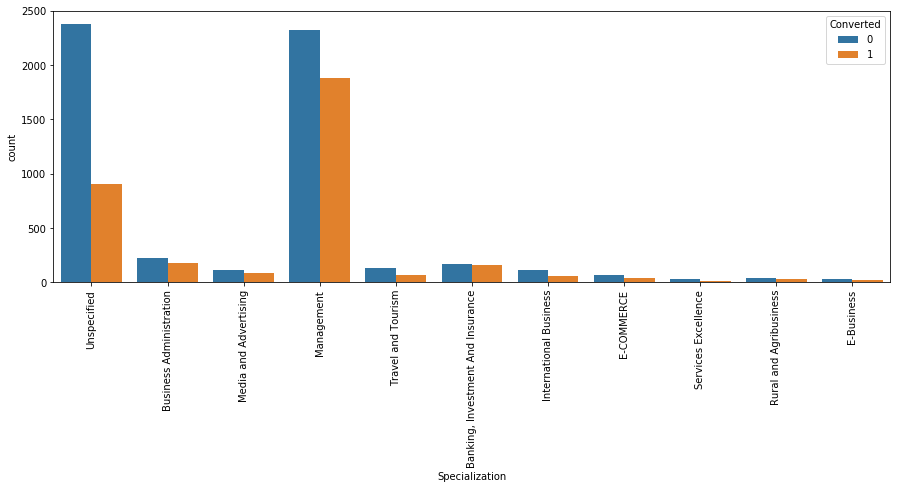

In [45]:
plt.figure(figsize=(15,5))
s1=sns.countplot(data.Specialization, hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [46]:
# Removing 'Prospect ID' , 'Lead Number' columns as they are uniqe values for each row 
data = data.drop(['Prospect ID' , 'Lead Number'], axis = 1)

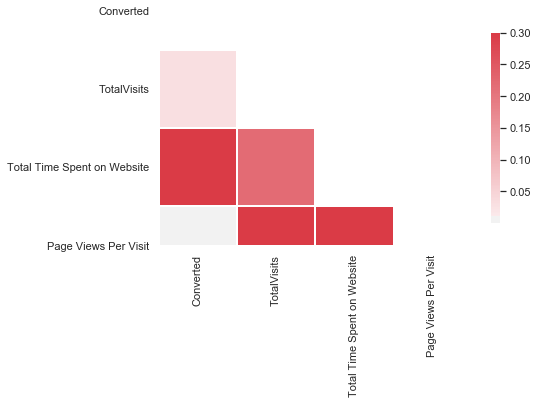

In [47]:
# Diagonal corelation matrix
sns.set(style="white")
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 7))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [48]:
data.dtypes

Lead Origin                                  object
Lead Source                                  object
Do Not Email                                 object
Do Not Call                                  object
Converted                                     int64
TotalVisits                                 float64
Total Time Spent on Website                   int64
Page Views Per Visit                        float64
Last Activity                                object
Specialization                               object
What is your current occupation              object
Search                                       object
Magazine                                     object
Newspaper Article                            object
X Education Forums                           object
Newspaper                                    object
Digital Advertisement                        object
Through Recommendations                      object
Receive More Updates About Our Courses       object
Tags        

In [49]:
# Lets begin with exploring the categorical columns to decide which ones we should keep in our final model
dropping_vars = []

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 26 columns):
Lead Origin                                 9074 non-null object
Lead Source                                 9074 non-null object
Do Not Email                                9074 non-null object
Do Not Call                                 9074 non-null object
Converted                                   9074 non-null int64
TotalVisits                                 9074 non-null float64
Total Time Spent on Website                 9074 non-null int64
Page Views Per Visit                        9074 non-null float64
Last Activity                               9074 non-null object
Specialization                              9074 non-null object
What is your current occupation             9074 non-null object
Search                                      9074 non-null object
Magazine                                    9074 non-null object
Newspaper Article                           9074

#### 'Lead Origin'

In [51]:

data['Lead Origin'].describe()

count                        9074
unique                          4
top       Landing Page Submission
freq                         4885
Name: Lead Origin, dtype: object

In [52]:
data['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

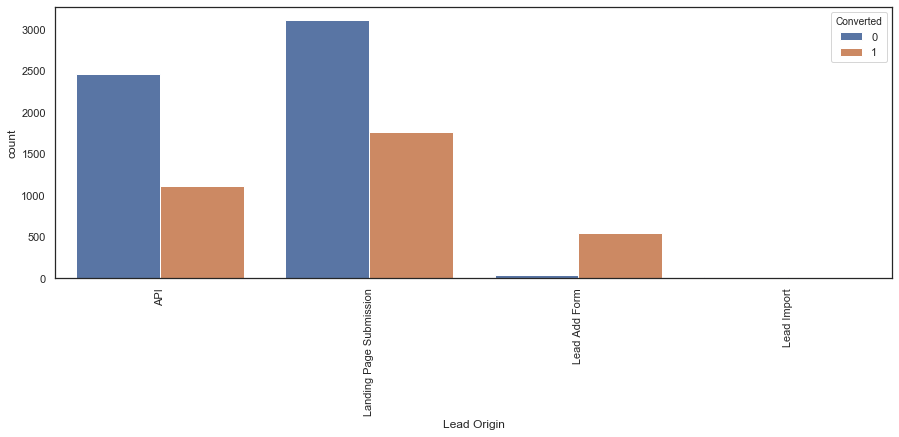

In [53]:
plt.figure(figsize=(15,5))
s1=sns.countplot(data['Lead Origin'], hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### 'Lead Source'

In [54]:
data['Lead Source'].describe()

count       9074
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

In [55]:
data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
WeLearn                 1
youtubechannel          1
welearnblog_Home        1
NC_EDM                  1
testone                 1
blog                    1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [56]:
data['Lead Source'] = data['Lead Source'].replace('google','Google')
data['Lead Source'] = data['Lead Source'].replace('Facebook','Social Media')
data['Lead Source'] = data['Lead Source'].replace(['bing','Click2call','Press_Release','Live Chat','youtubechannel','welearnblog_Home','testone','NC_EDM','WeLearn','blog','Pay per Click Ads'],'Others')

#### 'Do Not Email'

In [57]:

data['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [58]:
# Skewed distribution
dropping_vars.append('Do Not Email')

#### 'Do Not Call'

In [59]:
data['Do Not Call'].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [60]:
# Skewed distribution
dropping_vars.append('Do Not Call')

#### 'Last Activity'

In [61]:
data['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

In [62]:
data['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [63]:
# Combining small value counts into 'View in browser link Clicked'
data['Last Activity'] = data['Last Activity'].replace(['Approached upfront','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],'View in browser link Clicked')

#### Specialization

In [64]:
data['Specialization'].value_counts()

Management                           4197
Unspecified                          3282
Business Administration               399
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
E-COMMERCE                            111
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [65]:
data['Specialization'] = data['Specialization'].replace('E-Business','E-COMMERCE')

#### Search 

In [66]:
data['Search'].describe()

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object

In [67]:
data['Search'].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [68]:
# Skewed Distributed Data
dropping_vars.append('Search')

#### Magazine

In [69]:
data.Magazine.value_counts()

No    9074
Name: Magazine, dtype: int64

In [70]:
# Only No is there in all 9074 rows , better to drop the column
dropping_vars.append('Magazine')

#### Newspaper Article  

In [71]:
data['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [72]:
# Skewed distribution
dropping_vars.append('Newspaper Article')

#### X Education Forums

In [73]:
data['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [74]:
# Skewed Distribution
dropping_vars.append('X Education Forums')

#### Newspaper

In [75]:
data['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [76]:
# Skewed Distribution
dropping_vars.append('Newspaper')

#### Digital Advertisement

In [77]:
data['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [78]:
# Skewed Distribution
dropping_vars.append('Digital Advertisement')

#### Through Recommendations

In [79]:
data['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [80]:
# Skewed Distribution
dropping_vars.append('Through Recommendations')

#### Receive More Updates About Our Courses 

In [81]:
data['Receive More Updates About Our Courses'].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [82]:
# Skewed Distribution
dropping_vars.append('Receive More Updates About Our Courses')

#### Tags

In [83]:
data['Tags'].value_counts()

Will revert after reading the email                  5343
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

In [84]:
# Groupping up categories havving below 100 value count
data['Tags'] = data['Tags'].replace(['wrong number given','invalid number','Diploma holder (Not Eligible)'
                                     'opp hangup','number not provided','in touch with EINS',
                                     'Lost to Others','Still Thinking','Want to take admission but has financial problems',
                                     'In confusion whether part time or DLP','Interested in Next batch','Lateral student',
                                     'Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)'],'Not Eligible')

In [85]:
data['Tags'].value_counts()

Will revert after reading the email    5343
Ringing                                1187
Interested in other courses             509
Already a student                       465
Closed by Horizzon                      301
switched off                            240
Not Eligible                            204
Busy                                    185
Lost to EINS                            172
Not doing further education             145
Interested  in full time MBA            116
Graduation in progress                  111
Diploma holder (Not Eligible)            63
opp hangup                               33
Name: Tags, dtype: int64

#### 'Update me on Supply Chain Content'

In [86]:
data['Update me on Supply Chain Content'].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [87]:
# Skewed Distribution
dropping_vars.append('Update me on Supply Chain Content')

#### 'Get updates on DM Content'

In [88]:
data['Get updates on DM Content'].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

In [89]:
# Skewed Distribution
dropping_vars.append('Get updates on DM Content')

#### 'I agree to pay the amount through cheque'

In [90]:
data['I agree to pay the amount through cheque'].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

In [91]:
# Skewed Distribution
dropping_vars.append('I agree to pay the amount through cheque')

####  'A free copy of Mastering The Interview'

In [92]:
data['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

#### 'Last Notable Activity'

In [93]:
data['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
Resubscribed to emails             1
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [94]:
# Clubbing below 100 value count frequency
data['Last Notable Activity'] = data['Last Notable Activity'].replace(['Email Bounced',
                                                                      'Unreachable',
                                                                      'Had a Phone Conversation',
                                                                      'Email Marked Spam',
                                                                      'Approached upfront',
                                                                      'Email Received',
                                                                      'Resubscribed to emails',
                                                                      'View in browser link Clicked',
                                                                      'Form Submitted on Website'],'Unsubscribed')

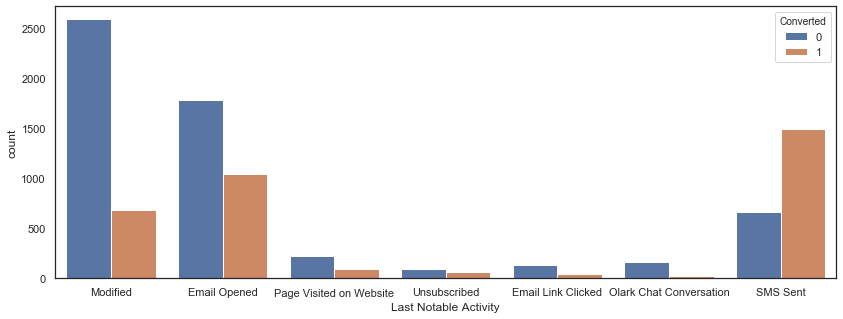

In [95]:
#visualizing count of Last Notable Activity on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = data)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=0)
plt.show()

In [96]:
dropping_vars

['Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [97]:
data = data.drop(['Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque'], axis = 1)

In [98]:
data.shape

(9074, 13)

In [99]:
data.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## Numerical Attributes Analysis

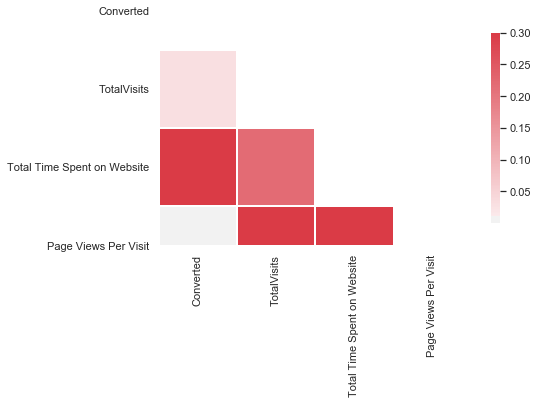

In [100]:
# Diagonal corelation matrix
sns.set(style="white")
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 7))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

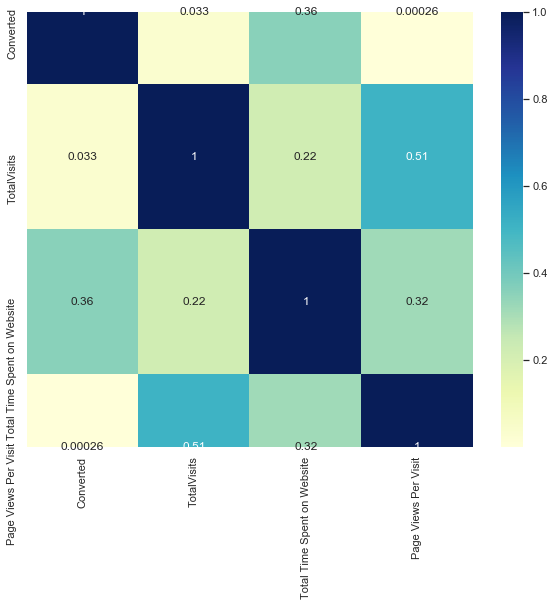

In [101]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

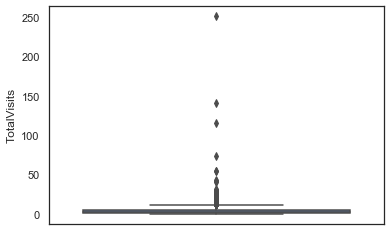

In [102]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=data['TotalVisits'])
plt.show()

In [103]:
#checking percentile values for "Total Visits"

data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

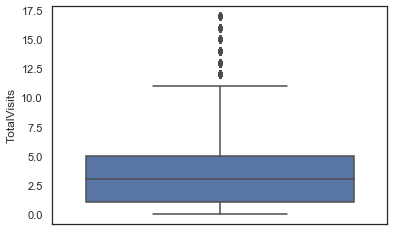

In [104]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = data['TotalVisits'].quantile(0.99)
data = data[(data['TotalVisits'] <= Q3)]
Q1 = data['TotalVisits'].quantile(0.01)
data = data[(data['TotalVisits'] >= Q1)]
sns.boxplot(y=data['TotalVisits'])
plt.show()

In [105]:
# After removing outliers , now its now better in visualizing the spread.

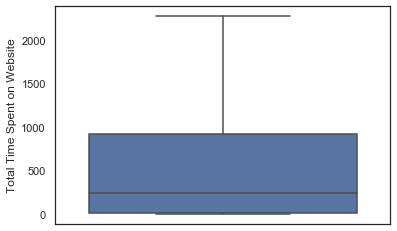

In [106]:
# 'Total Time Spent on Website'
# visualizing 

plt.figure(figsize=(6,4))
sns.boxplot(y=data['Total Time Spent on Website'])
plt.show()

In [107]:
# Looks like there are no outliers in 'Total Time Spent on Website'

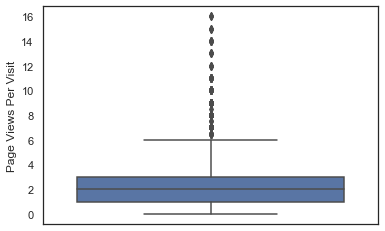

In [108]:
# 'Page Views Per Visit'
# visualizing 


plt.figure(figsize=(6,4))
sns.boxplot(y=data['Page Views Per Visit'])
plt.show()

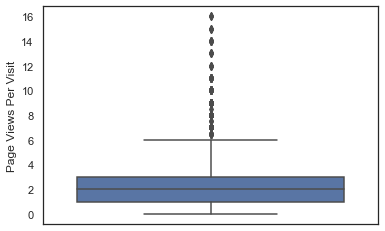

In [109]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = data['Page Views Per Visit'].quantile(0.99)
leads = data[data['Page Views Per Visit'] <= Q3]
Q1 = data['Page Views Per Visit'].quantile(0.01)
data = data[data['Page Views Per Visit'] >= Q1]
sns.boxplot(y=data['Page Views Per Visit'])
plt.show()

In [110]:
# As we can observe there are few outliers in 'Page Views Per Visit'
# But the outliers are in the above range of 75th quartile , these wont impact

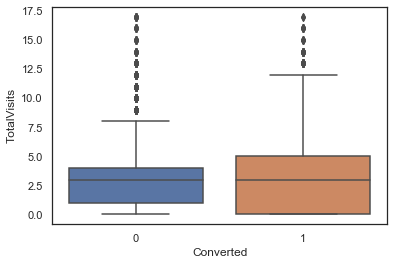

In [111]:
# "Total Visits" and Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data)
plt.show()

In [112]:
# Median for converted and not converted leads is almost same.
# No inference can be made

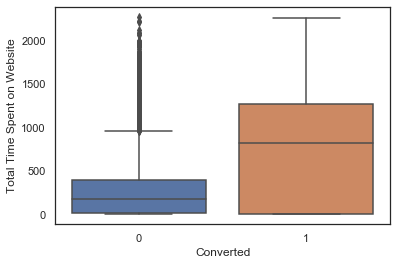

In [113]:
# "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=data['Converted'], y=data['Total Time Spent on Website'])
plt.show()


In [114]:
# Inference - Leads which are converted spent way more time on website as compared to those which are not converted


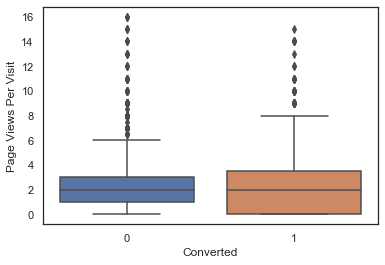

In [115]:
# "Page Views Per Visit" vs 'Converted' variable

sns.boxplot(x=data['Converted'],y=data['Page Views Per Visit'])
plt.show()


In [116]:
# Median for converted and unconverted leads is the same.
# Nothing can be said specifically for lead conversion from Page Views Per Visit

In [117]:
data.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unspecified,Unemployed,Interested in other courses,NaN,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unspecified,Unemployed,Ringing,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unspecified,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 13 columns):
Lead Origin                               8991 non-null object
Lead Source                               8991 non-null object
Converted                                 8991 non-null int64
TotalVisits                               8991 non-null float64
Total Time Spent on Website               8991 non-null int64
Page Views Per Visit                      8991 non-null float64
Last Activity                             8991 non-null object
Specialization                            8991 non-null object
What is your current occupation           8991 non-null object
Tags                                      8991 non-null object
City                                      5425 non-null object
A free copy of Mastering The Interview    8991 non-null object
Last Notable Activity                     8991 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 1.3+ MB


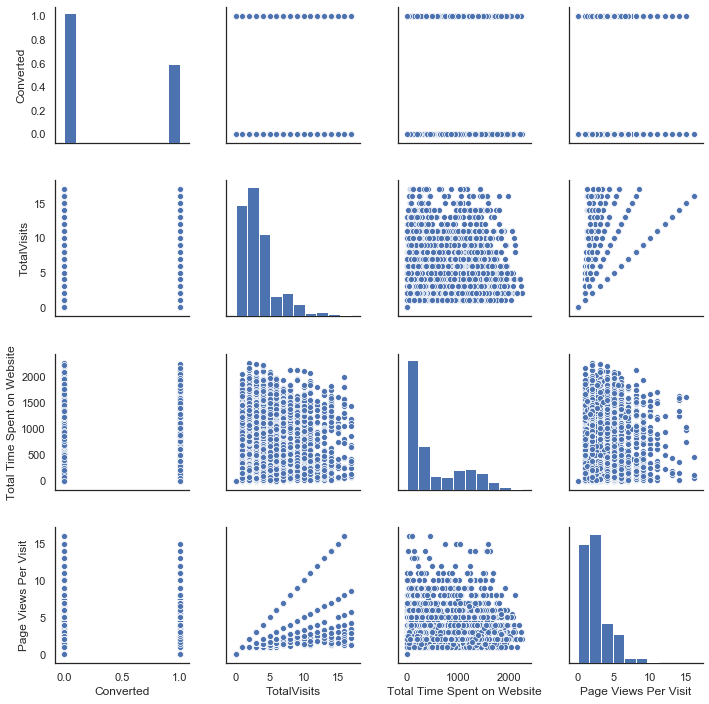

In [119]:
sns.pairplot(data)
plt.show()

## DUMMY VARIABLE CREATIONS

In [120]:
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [121]:
#getting dummies and dropping the first column and adding the results to the master dataframe
status = pd.get_dummies(data[['Lead Origin','What is your current occupation',
                             'City','A free copy of Mastering The Interview']], drop_first = True)

data = pd.concat([data, status], axis=1)

In [122]:
data.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,A free copy of Mastering The Interview_Yes
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unspecified,Unemployed,Interested in other courses,NaN,No,Modified,0,0,0,0,1,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unspecified,Unemployed,Ringing,NaN,No,Email Opened,0,0,0,0,1,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened,1,0,0,1,0,0,0,1
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified,1,0,0,0,1,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unspecified,Unemployed,Will revert after reading the email,Mumbai,No,Modified,1,0,0,0,1,0,0,0


In [123]:
# creating dummy variables
status = pd.get_dummies(data[[
'Lead Source','Specialization','Last Notable Activity','Last Activity',"Tags"]], drop_first=False)
data = pd.concat([data, status], axis=1)

In [124]:
data.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,A free copy of Mastering The Interview_Yes,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_Unspecified,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Eligible,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_opp hangup,Tags_switched off
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unspecified,Unemployed,Interested in other courses,NaN,No,Modified,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unspecified,Unemployed,Ringing,NaN,No,Email Opened,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unspecified,Unemployed,Will revert after reading the email,Mumbai,No,Modified,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [125]:
# Dropping specific dummy variables in which Conversion rate is low
data = data.drop(['Specialization_Unspecified'], 1)
data = data.drop(['Lead Source_Others'], 1)
data = data.drop(['Last Notable Activity_Unsubscribed'], 1)
data = data.drop(['Tags_Not Eligible'], 1)
data = data.drop(['Last Activity_Unsubscribed'],1)



In [126]:
data.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,A free copy of Mastering The Interview_Yes,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_View in browser link Clicked,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_opp hangup,Tags_switched off
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unspecified,Unemployed,Interested in other courses,NaN,No,Modified,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unspecified,Unemployed,Ringing,NaN,No,Email Opened,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unspecified,Unemployed,Will revert after reading the email,Mumbai,No,Modified,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [127]:
#dropping the original columns after dummy variable creation

data = data.drop(['Lead Origin','What is your current occupation','City','Lead Source','Specialization','Last Notable Activity','Last Activity',"Tags",'A free copy of Mastering The Interview'],1)
# Removing unwated columns


In [128]:
data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,A free copy of Mastering The Interview_Yes,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_View in browser link Clicked,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_opp hangup,Tags_switched off
0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [129]:
data.shape

(8991, 59)

## TRAIN - TEST - SPLIT

In [130]:
from sklearn.model_selection import train_test_split

# Putting Converted variable to y
y = data['Converted']


X=data.drop('Converted', axis=1)

In [131]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [132]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6293 entries, 1467 to 5803
Data columns (total 58 columns):
TotalVisits                                             6293 non-null float64
Total Time Spent on Website                             6293 non-null int64
Page Views Per Visit                                    6293 non-null float64
Lead Origin_Landing Page Submission                     6293 non-null uint8
Lead Origin_Lead Add Form                               6293 non-null uint8
Lead Origin_Lead Import                                 6293 non-null uint8
What is your current occupation_Student                 6293 non-null uint8
What is your current occupation_Unemployed              6293 non-null uint8
What is your current occupation_Working Professional    6293 non-null uint8
City_Other Cities                                       6293 non-null uint8
A free copy of Mastering The Interview_Yes              6293 non-null uint8
Lead Source_Direct Traffic                        

In [133]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2698 entries, 8692 to 976
Data columns (total 58 columns):
TotalVisits                                             2698 non-null float64
Total Time Spent on Website                             2698 non-null int64
Page Views Per Visit                                    2698 non-null float64
Lead Origin_Landing Page Submission                     2698 non-null uint8
Lead Origin_Lead Add Form                               2698 non-null uint8
Lead Origin_Lead Import                                 2698 non-null uint8
What is your current occupation_Student                 2698 non-null uint8
What is your current occupation_Unemployed              2698 non-null uint8
What is your current occupation_Working Professional    2698 non-null uint8
City_Other Cities                                       2698 non-null uint8
A free copy of Mastering The Interview_Yes              2698 non-null uint8
Lead Source_Direct Traffic                         

## SCALING THE NUMERICAL COLUMNS USING STANDARD SCALING

In [134]:
## SCALING THE NUMERICAL COLUMNS USING STANDARD SCALING


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,A free copy of Mastering The Interview_Yes,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_View in browser link Clicked,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_opp hangup,Tags_switched off
1467,0.246579,0.764873,0.777363,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
108,0.908719,-0.148599,0.298183,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7858,2.564067,-0.649536,-0.554758,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5220,-1.077699,-0.881587,-1.139357,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3871,-1.077699,-0.881587,-1.139357,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [135]:
data.shape

(8991, 59)

## MODEL BUILDING USING STATS MODELLING & RFE

In [136]:
import statsmodels.api as sm

In [137]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)


In [138]:
rfe.support_

array([False, False, False, False,  True, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
        True,  True,  True, False, False, False, False,  True, False,
        True,  True, False,  True])

In [139]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 38),
 ('Total Time Spent on Website', False, 5),
 ('Page Views Per Visit', False, 39),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 22),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 40),
 ('A free copy of Mastering The Interview_Yes', False, 37),
 ('Lead Source_Direct Traffic', False, 12),
 ('Lead Source_Google', False, 14),
 ('Lead Source_Olark Chat', False, 28),
 ('Lead Source_Organic Search', False, 15),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source_Social Media', False, 29),
 ('Lead Source_Welingak Website', False, 3),
 ('Specialization_Banking, Investment And Insurance', False, 16),
 ('Specialization_Business Administration', False, 18),
 ('Specialization_E-COM

In [140]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Lead Add Form', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Activity_Email Bounced', 'Last Activity_SMS Sent',
       'Tags_Already a student', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off'],
      dtype='object')

#### BUILDING MODEL ON TRAINING DATASET 

In [141]:
# Building model on training data set using RFE and manual p-value & vif approach

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1378.7
Date:                Mon, 01 Jun 2020   Deviance:                       2757.4
Time:                        22:20:40   Pearson chi2:                 1.22e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.7812      0.235    -28.843      0.000      -7.242      -6.320
Lead Origin_Lead Add Form                                1.4916      0.360      4.139      0.000       0.785       2.198
What is your current occupation_Student                  3.9369      0.450      8.746      0.000       3.055       4.819
What is your current occupation_Unemployed               3.7139      0.123     30.149      0.000       3.472       3.955
What is your current occupation_Working Professional     5.0913      0.295     17.245      0.000       4.513       5.670
Last Notable Activity_Modified                          -1.3943      0.114    -12.210      0.000      -1.618      -1.170
Last Notable Activity_Olark Chat Conversation           -1.8883      0.397     -4.753      0.000      -2.667      -1.110
Last Activity_Email Bounced                             -2.3618      0.407     -5.804      0.000      -3.159      -1.564
Last Activity_SMS Sent                                   2.0274      0.116     17.458      0.000       1.800       2.255
Tags_Already a student                                  -2.3312      1.024     -2.277      0.023      -4.338      -0.325
Tags_Busy                                                2.3710      0.275      8.635      0.000       1.833       2.909
Tags_Closed by Horizzon                                  8.2370      0.758     10.862      0.000       6.751       9.723
Tags_Lost to EINS                                       10.3913      0.714     14.556      0.000       8.992      11.790
Tags_Ringing                                            -1.5644      0.283     -5.529      0.000      -2.119      -1.010
Tags_Will revert after reading the email                 4.8084      0.207     23.266      0.000       4.403       5.213
Tags_switched off                                       -2.6280      0.741     -3.549      0.000      -4.079      -1.177
========================================================================================================================
"""

In [142]:
# All the p-values are less than 0.05 which is great


In [143]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



,Features,VIF
10,Tags_Closed by Horizzon,1.25
1,What is your current occupation_Student,1.15
14,Tags_switched off,1.12
9,Tags_Busy,1.11
6,Last Activity_Email Bounced,1.09
11,Tags_Lost to EINS,1.06
5,Last Notable Activity_Olark Chat Conversation,1.04
3,What is your current occupation_Working Profes...,0.55
0,Lead Origin_Lead Add Form,0.43
8,Tags_Already a student,0.27


In [144]:
# Vif values for all the columns are less than 5 , which is great

In [145]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1467    0.994211
108     0.020610
7858    0.977434
5220    0.513645
3871    0.122088
686     0.850823
1694    0.207562
2180    0.207562
6845    0.122088
191     0.033340
dtype: float64

In [146]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99421056, 0.02061046, 0.97743353, 0.51364464, 0.12208845,
       0.85082331, 0.20756205, 0.20756205, 0.12208845, 0.03334042])

In [147]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Convert_prob,Prospect ID
0,1,0.994211,1467
1,0,0.020610,108
2,1,0.977434,7858
3,1,0.513645,5220
4,0,0.122088,3871


In [148]:
y_train_pred_final['Predicted'] = y_train_pred_final['Convert_prob'].map(lambda x: 1 if x > 0.6 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Convert_prob,Prospect ID,Predicted
0,1,0.994211,1467,1
1,0,0.020610,108,0
2,1,0.977434,7858,1
3,1,0.513645,5220,0
4,0,0.122088,3871,0


## CONFUSION MATRIX

In [149]:
# Lets check the confusion matrix 

In [150]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix( y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3781  145]
 [ 440 1927]]


In [151]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9070395677737169


## Model evaluation and optimization

In [152]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives



# Let's see the sensitivity of our logistic regression model
print("sensitivity = " , TP / float(TP+FN))

# Let us calculate specificity
print("specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("false postive rate = ", FP/ float(TN+FP))

# positive predictive value 
ppv = TP / float(TP+FP)
print ("positive predictive value =  ",TP / float(TP+FP))

# Negative predictive value
print ("Negative predictive value = ",TN / float(TN+ FN))

sensitivity =  0.8141106886354035
specificity =  0.9630667345899134
false postive rate =  0.0369332654100866
positive predictive value =   0.930019305019305
Negative predictive value =  0.8957592987443733


## PLOTTING ROC CURVE

In [153]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [154]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_prob, drop_intermediate = False )

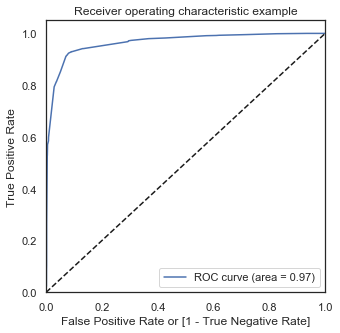

In [155]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_prob)

In [156]:
# ROC curve area indicating is 0.97 , pretty close to 1 which is good.

### Finding Optimal Cutoff Point

In [157]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.994211,1467,1,1,1,1,1,1,1,1,1,1,1
1,0,0.020610,108,0,1,0,0,0,0,0,0,0,0,0
2,1,0.977434,7858,1,1,1,1,1,1,1,1,1,1,1
3,1,0.513645,5220,0,1,1,1,1,1,1,0,0,0,0
4,0,0.122088,3871,0,1,1,0,0,0,0,0,0,0,0


In [158]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','ppv','npv'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    ppv = cm1[1,1] /(cm1[1,1]+cm1[0,1])
    npv = cm1[0,0]/(cm1[0,0]+cm1[1,0])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,ppv,npv]
print(cutoff_df)

     prob  accuracy     sensi     speci       ppv       npv
0.0   0.0  0.376132  1.000000  0.000000  0.376132       NaN
0.1   0.1  0.805180  0.971272  0.705043  0.665027  0.976023
0.2   0.2  0.896711  0.941276  0.869842  0.813436  0.960889
0.3   0.3  0.921341  0.923532  0.920020  0.874400  0.952281
0.4   0.4  0.922295  0.913392  0.927662  0.883892  0.946712
0.5   0.5  0.921182  0.904520  0.931228  0.888013  0.941783
0.6   0.6  0.907040  0.814111  0.963067  0.930019  0.895759
0.7   0.7  0.907357  0.812421  0.964595  0.932590  0.895060
0.8   0.8  0.904497  0.793409  0.971472  0.943719  0.886358
0.9   0.9  0.840775  0.590199  0.991849  0.977607  0.800576


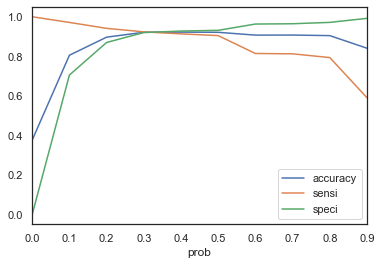

In [159]:
# Let's plot accuracy sensitivity and specificity for various probabilities to find cuttoff.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [160]:
#### 0.3 is the optimum point to take cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Convert_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Convert_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.994211,1467,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.020610,108,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.977434,7858,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.513645,5220,0,1,1,1,1,1,1,0,0,0,0,1
4,0,0.122088,3871,0,1,1,0,0,0,0,0,0,0,0,0


In [161]:
y_train_pred_final['Lead_Score'] = y_train_pred_final['Convert_prob'].map( lambda x: round(x*100))

y_train_pred_final[['Converted','Convert_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Convert_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.994211,1467,1,99
1,0,0.020610,108,0,2
2,1,0.977434,7858,1,98
3,1,0.513645,5220,1,51
4,0,0.122088,3871,0,12


In [162]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9213411727316065

In [163]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2


array([[3612,  314],
       [ 181, 2186]], dtype=int64)

In [164]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [165]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9235318969159273

In [166]:
# Let us calculate specificity
TN / float(TN+FP)

0.9200203769740194

In [167]:
# Accuracy : 91.78 %
# Sensitivity : 93.28%
# Specificity : 90.88%

In [168]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))
# Positive predictive value 
print (TP / float(TP+FP))
# Negative predictive value
print (TN / float(TN+ FN))

0.07997962302598065
0.8744
0.9522805167413657


## Business Evaluation : Precision and Recal

In [169]:
#Lets check the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3612,  314],
       [ 181, 2186]], dtype=int64)

In [170]:
# Precision

confusion[1,1]/(confusion[0,1]+confusion[1,1])


0.8744

In [171]:
# Recall


confusion[1,1]/(confusion[1,0]+confusion[1,1])


0.9235318969159273

In [172]:
from sklearn.metrics import precision_score, recall_score

In [173]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8744

In [174]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9235318969159273

In [175]:
from sklearn.metrics import precision_recall_curve

In [176]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_prob)

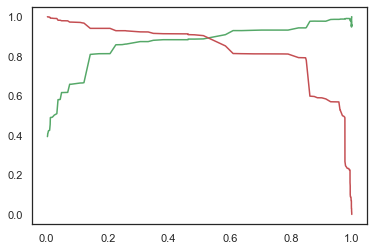

In [177]:
# Precision recall curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## FINAL MODEL BUILDING ON TEST DATASET

#### Scaling test data set

In [178]:

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,A free copy of Mastering The Interview_Yes,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_View in browser link Clicked,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_opp hangup,Tags_switched off
8692,-0.044017,-0.334002,-0.383910,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6126,-1.073713,-0.887592,-1.134419,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5198,-0.044017,-0.113659,-0.383910,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4979,0.299215,0.680306,0.866939,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9225,-0.387249,-0.752837,-0.133740,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [179]:
X_test = X_test[col]
X_test.head()

,Lead Origin_Lead Add Form,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Activity_Email Bounced,Last Activity_SMS Sent,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
8692,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
6126,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
5198,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4979,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
9225,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0


In [180]:
# Adding constant
X_test_sm = sm.add_constant(X_test)

## PREDICTIONS ON TEST SET

In [181]:
y_test_pred = res.predict(X_test_sm)

In [182]:
y_test_pred[:10]

8692    0.791017
6126    0.994832
5198    0.122088
4979    0.791017
9225    0.001087
3533    0.033340
2726    0.848675
3450    0.033340
7683    0.977434
6286    0.585841
dtype: float64

In [183]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [184]:
# Let's see the head
y_pred_1.head()

,0
8692,0.791017
6126,0.994832
5198,0.122088
4979,0.791017
9225,0.001087


In [185]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [186]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [187]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [188]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [189]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,8692,0.791017
1,1,6126,0.994832
2,1,5198,0.122088
3,1,4979,0.791017
4,0,9225,0.001087


In [190]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [191]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,8692,0.791017
1,1,6126,0.994832
2,1,5198,0.122088
3,1,4979,0.791017
4,0,9225,0.001087


In [192]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,8692,0,0.791017,79
1,6126,1,0.994832,99
2,5198,1,0.122088,12
3,4979,1,0.791017,79
4,9225,0,0.001087,0


In [193]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,8692,0,0.791017,79,1
1,6126,1,0.994832,99,1
2,5198,1,0.122088,12,0
3,4979,1,0.791017,79,1
4,9225,0,0.001087,0,0


In [194]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9266123054114158

In [195]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1537,  129],
       [  69,  963]], dtype=int64)

In [196]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


# Let's see the sensitivity of our logistic regression model
print("sensitivity = " , TP / float(TP+FN))

# Let us calculate specificity
print("specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("false postive rate = ", FP/ float(TN+FP))

# positive predictive value 
print ("positive predictive value = ",TP / float(TP+FP))

# Negative predictive value
print ("Negative predictive value = ",TN / float(TN+ FN))

sensitivity =  0.9331395348837209
specificity =  0.9225690276110444
false postive rate =  0.07743097238895558
positive predictive value =  0.8818681318681318
Negative predictive value =  0.9570361145703612
